In [2]:
import sys
sys.path.append('/notebooks/MOD2NN')

In [3]:
import os
import glob

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Faraday.two_dim.module.lib.layers import *

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

In [5]:
files = glob.glob("trained_model/20221223/*")
files.sort()
files

['trained_model/20221223/z0_0.000000_seed_1',
 'trained_model/20221223/z0_0.000500_seed_1',
 'trained_model/20221223/z0_0.001000_seed_1']

In [6]:
evals = []
for path in files:
    model = tf.keras.models.load_model(path)
    evals.append(model.evaluate(x_test, y_test))

313/313 [==============================] - 4s 12ms/step - loss: 1.1379 - accuracy: 0.6948


# フォトマスクから1層目までの距離の違いによる正解率の変化
z0=フォトマスクから1層目までの距離

Text(0, 0.5, 'Accuracy')

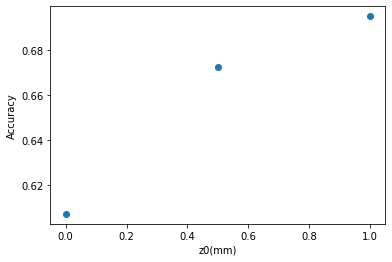

In [16]:
z = np.array([0, 0.5e-3, 1.0e-3])
plt.scatter(z*1000, np.array(evals)[:,1])
plt.xlabel("z0(mm)")
plt.ylabel("Accuracy")

## フォトマスクと1層目までの距離=0の磁区パターン

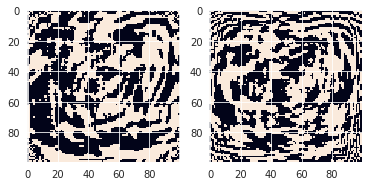

In [5]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.000000_seed_1")
w1 = model.layers[3].get_weights()
b_w1 = tf.clip_by_value((w1[0]+1.)/2.,0, 1)
b_w1 = 2.*tf.round(b_w1)-1.

w2 = model.layers[5].get_weights()
b_w2 = tf.clip_by_value((w2[0]+1.)/2.,0, 1)
b_w2 = 2.*tf.round(b_w2)-1.

plt.subplot(121)
plt.imshow(b_w1, interpolation="none")

plt.subplot(122)
plt.imshow(b_w2, interpolation="none")

In [8]:
np.savetxt("trained_model/20221223/z0_0.000000_seed_1/layer1.csv",b_w1, delimiter=",", fmt="%d")
np.savetxt("trained_model/20221223/z0_0.000000_seed_1/layer2.csv",b_w2, delimiter=",", fmt="%d")

## フォトマスクと1層目までの距離=0.5mmの磁区パターン

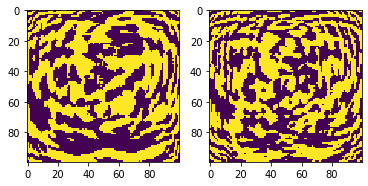

In [36]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.000500_seed_1")
w1 = model.layers[4].get_weights()
b_w1 = tf.clip_by_value((w1[0]+1.)/2.,0, 1)
b_w1 = 2.*tf.round(b_w1)-1.

w2 = model.layers[6].get_weights()
b_w2 = tf.clip_by_value((w2[0]+1.)/2.,0, 1)
b_w2 = 2.*tf.round(b_w2)-1.

plt.subplot(121)
plt.imshow(b_w1, interpolation="none")

plt.subplot(122)
plt.imshow(b_w2, interpolation="none")

## フォトマスクと1層目までの距離=1.0mmの磁区パターン

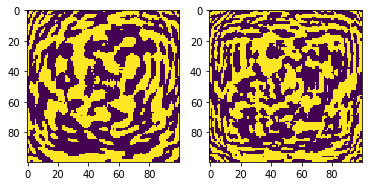

In [37]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.001000_seed_1")
w1 = model.layers[4].get_weights()
b_w1 = tf.clip_by_value((w1[0]+1.)/2.,0, 1)
b_w1 = 2.*tf.round(b_w1)-1.

w2 = model.layers[6].get_weights()
b_w2 = tf.clip_by_value((w2[0]+1.)/2.,0, 1)
b_w2 = 2.*tf.round(b_w2)-1.

plt.subplot(121)
plt.imshow(b_w1, interpolation="none")

plt.subplot(122)
plt.imshow(b_w2, interpolation="none")

Text(0, 0.5, 'Validation Loss')

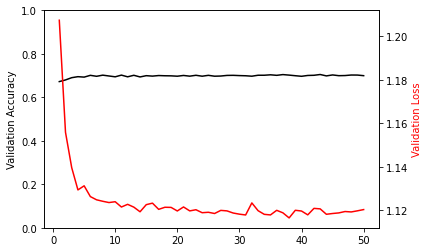

In [14]:
path = "trained_model/20221223/z0_0.000500_seed_1/history.csv"
df = pd.read_csv(path)
fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
epochs = np.arange(len(df["val_loss"])) + 1
ax1.plot(epochs, df["val_accuracy"], label="Val. Acc.", color="black")
ax2.plot(epochs, df["val_loss"], label="Val. Loss", color="red")

ax1.set_ylim(0, 1)
ax1.set_ylabel("Validation Accuracy", color="black")
ax2.set_ylabel("Validation Loss", color="red")

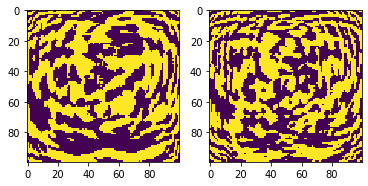

In [3]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.000500_seed_1")
w1 = model.layers[4].get_weights()
b_w1 = tf.clip_by_value((w1[0]+1.)/2.,0, 1)
b_w1 = 2.*tf.round(b_w1)-1.

w2 = model.layers[6].get_weights()
b_w2 = tf.clip_by_value((w2[0]+1.)/2.,0, 1)
b_w2 = 2.*tf.round(b_w2)-1.

plt.subplot(121)
plt.imshow(b_w1, interpolation="none")

plt.subplot(122)
plt.imshow(b_w2, interpolation="none")


In [6]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.000000_seed_1")

In [7]:
train_num = 10
test_num = 10
total = train_num + test_num
train_data = {}
test_data = {}
for i in range(10):
    train_data[str(i)] = np.where(x_train[np.where(y_train == i)][0:train_num]>0.5, 1, 0)
    test_data[str(i)] = np.where(x_test[np.where(y_test == i)][0:test_num] > 0.5, 1, 0)
N_type = 10
N_img = 10

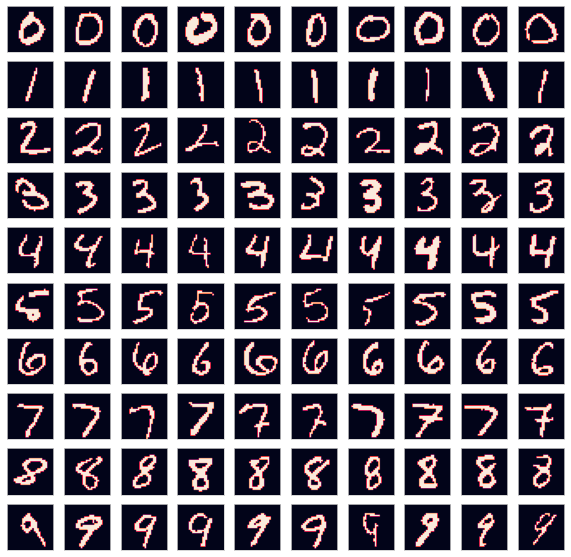

In [8]:
fig, axes = plt.subplots(N_type, N_img, figsize=(10, 10))

for i, _ax in enumerate(axes):
    for j, ax in enumerate(_ax):
        ax.imshow(test_data[list(test_data.keys())[i]][j, :, :])
        ax.set_xticks([], [])
        ax.set_yticks([], [])
test_array = np.array(list(test_data.values()))
test_array = test_array.reshape((-1, 28, 28))

In [9]:
def create_model():
    theta = -0.018369590863585472
    eta = 0.015369031578302383
    shape = (100, 100)
    inputs = tf.keras.Input((28, 28))
    x = ImageResizing(shape)(inputs)
    x = ImageBinarization()(x)
    x = IntensityToElectricField(shape)(x)
    x = BinarizedMO(shape, theta=theta, eta=eta, beta=5.)(x)
    x = AngularSpectrum(shape, wavelength=532.e-9, z=0.5e-3, d=1.0e-6, n=2.0, method="expand")(x)
    x = BinarizedMO(shape, theta=theta, eta=eta, beta=5.)(x)
    x = AngularSpectrum(shape, wavelength=532.e-9, z=0.5e-3, d=1.0e-6, method="expand")(x)
    x = FaradayRotationByStokes(shape)(x)
    x = MNISTDetector(10)(x)
    x = tf.keras.layers.Softmax()(x)
    return tf.keras.Model(inputs, x)


model_re = create_model()
model_re.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 image_resizing (ImageResizi  (None, 100, 100)         0         
 ng)                                                             
                                                                 
 image_binarization (ImageBi  (None, 100, 100)         0         
 narization)                                                     
                                                                 
 intensity_to_electric_field  (None, 2, 100, 100)      0         
  (IntensityToElectricField)                                     
                                                                 
 binarized_mo (BinarizedMO)  (None, 2, 100, 100)       10000     
                                                             

In [10]:
model_re.set_weights(model.get_weights())

In [51]:
model_re.layers[-2]

In [52]:
outputs = [
    model_re.layers[2].output,
    ElectricFieldToIntensity((100, 100))(model_re.layers[-4].output),
    model_re.layers[-3].output,
    model_re.layers[-2].output
]
hidden_model = tf.keras.Model(inputs=model_re.input, outputs=outputs)
hidden_pred = hidden_model.predict(test_array)

4/4 [==============================] - 0s 7ms/step


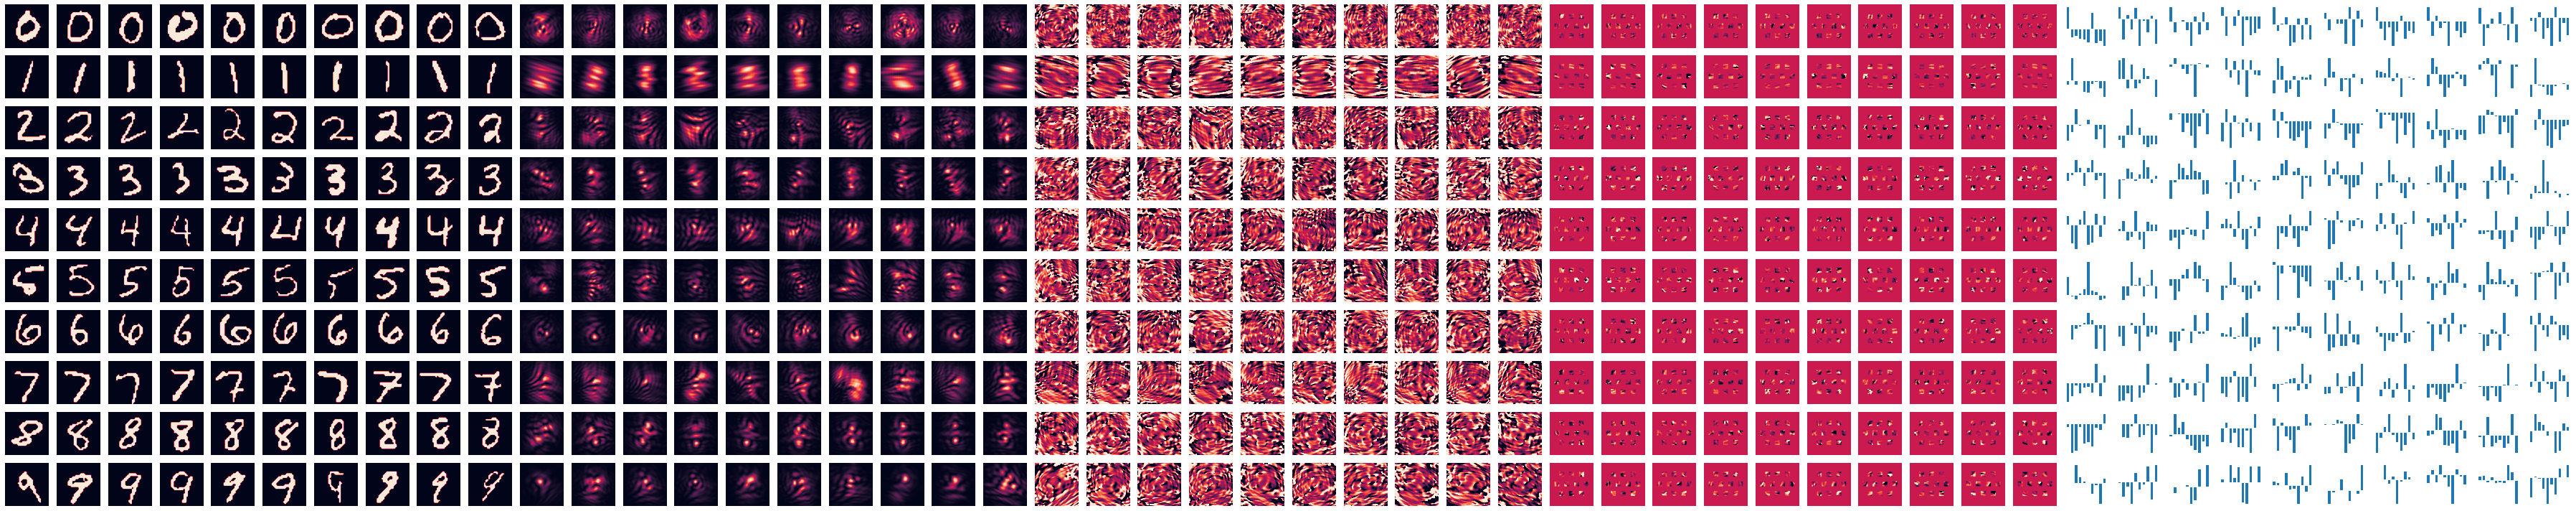

In [53]:
N_type = 10
N_img = 10

theta = 0.018369590863585472

mask = model_re.layers[-2].get_photo_mask()
fig, axes = plt.subplots(N_type, N_img * 5, figsize=(50, 10))

for row in range(N_type):
    for col in range(N_img):
        axes[row, col].imshow(hidden_pred[0][row * N_type + col, :, :])
        axes[row, col + N_img].imshow(hidden_pred[1][row * N_type + col, :, :])
        axes[row, col + N_img*2].imshow(hidden_pred[2][row * N_type + col, :, :], vmin=-theta*2, vmax=theta*2)
        axes[row, col + N_img*3].imshow(hidden_pred[2][row * N_type + col, :, :] * mask, vmin=-theta*2, vmax=theta*2)
        axes[row, col + N_img*4].bar(np.arange(10), hidden_pred[3][row * N_type + col, :])

for _ax in axes:
    for ax in _ax:
        ax.axis(False)

fig.tight_layout()
fig.savefig("out/aa.png", dpi=400)

313/313 [==============================] - 2s 7ms/step


Text(0.5, 1.0, 'Normalized confusion matrix')

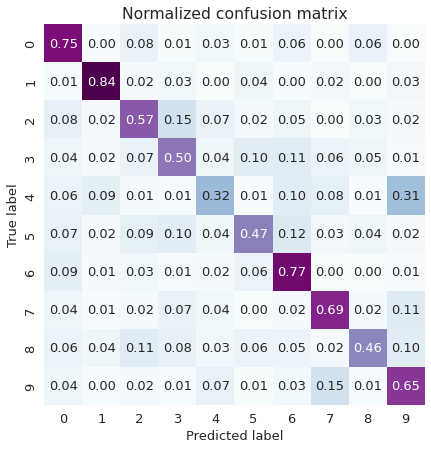

In [13]:
pred_label = tf.argmax(model.predict(x_test), axis=-1).numpy()
cm = tf.math.confusion_matrix(y_test, pred_label)
label_tot = np.sum(cm, axis=1).reshape(-1, 1)
norm_cm = cm / label_tot

plt.figure(figsize=(7, 7))
sns.heatmap(norm_cm, square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu')
plt.rcParams["font.size"] = 13
plt.xlabel("Predicted label", fontsize=13)
plt.ylabel("True label", fontsize=13)
plt.title("Normalized confusion matrix")

In [14]:
tot = 0

for i in range(10):
    tot += norm_cm[i,i]

tot/10

<tf.Tensor: shape=(), dtype=float64, numpy=0.6027233226737125>